### NOTE
If $\sum_{i} ||A||^2$ is the average of the squared error norm,This quantity can be written as $\frac{1}{n} ||A||^2$
Where $||A||_F=\sqrt (\sum_{i}^m\sum_{j}^n A_{ij}^2) = \sqrt(Tr(A^{T}A))$
### LOCO
The parameters in the used model is varied by LOCO to minimize the $ \chi^2 $: deviation between the model and measured orbit response matrices $\eta_{model}$ and $\eta_{measured}$. Where $\sigma_i$ is the measured noise level on the ith BPM (variance of input error). And $W_i$ is the weights diagonal matrix $=\frac{1}{ \sigma^2_{i}}$.


$$  \chi^2  =\sum_{i} ||\epsilon||^2=\sum_{i,j} \frac{(\hat{\eta_{i,j}}- \eta_{model,i,j})^2}{\sigma^2_{i}}  = \sum_{i,j} (\Delta \eta_{i,j})^2 W_{i} =
 (\Delta \eta)(\Delta \eta)^{T} W$$


Assume $\eta$ is a linear function of $g_k$ so $\Delta \eta = \frac{\partial{\eta}}{\partial{g_k}}  \Delta g_k$.  LOCO finds those changes $\Delta g$ that are the best solution to $(\eta_{model,i,j}-\hat{\eta_{i,j}})=0$


$$ \hat{\eta} =   \eta_{model}+ \sum_{k}\frac{\partial{\eta}}{\partial{g_k}}  \Delta g_k+ \hat{\eta} \Delta x^i -\hat{\eta} \Delta y^j +
\sum_{l}\frac{\partial{\eta}}{\partial{p_l}} \Delta p_l $$
where $\Delta x^i$ is the amount that the reading of monitor i differs from unity and $\Delta y^j$ the scale error of steering magnet j. Additional parameters $p_l$ that can be accounted for by numerically determining the derivative $\frac{\partial{\eta_{i,j}}}{\partial{p_l}}$ and including parameter variations $\Delta p_l$ in the fitting procedure.




Weighted Least Square Method

$$  \chi^{2}_w =  \sum_{i} (\Delta \eta-\sum_{k}\frac{\partial{\eta}}{\partial{g_k}}  \Delta g_k)^{2}W_{i}$$

$$  \chi^{2}_w =   (\Delta \eta-\frac{\partial{\eta}}{\partial{g}}  \Delta g)^{T}W(\Delta \eta-\sum_{k}\frac{\partial{\eta}}{\partial{g}}  \Delta g)$$


$$  \chi^{2}_w =   \Delta \eta^T \Delta \eta W - \Delta \eta^T \frac{\partial{\eta}}{\partial{g}}  \Delta g W -  \Delta g^{T} \frac{\partial{\eta}^T}{\partial{g}} \Delta \eta W + \Delta g^{T}\frac{\partial{\eta}^T}{\partial{g}}\frac{\partial{\eta}}{\partial{g}}\Delta g W $$


$$ \frac{\partial{\chi^{2}_w}}{\partial{g}} = - 2 \frac{\partial{\eta}^{T}}{\partial{g}} W \Delta \eta + 2 \frac{\partial{\eta}}{\partial{g}}^{T} W \frac{\partial{\eta}}{\partial{g}}  \Delta g =0$$

$$ \frac{\partial{\eta}}{\partial{g}}^{T}W \frac{\partial{\eta}}{\partial{g}} \Delta{g} = \frac{\partial{\eta}^{T}}{\partial{g}} W\Delta \eta$$


$$  \Delta g =( \frac{\partial{\eta}}{\partial{g}} ^{T}W\frac{\partial{\eta}}{\partial{g}})^{-1} \frac{\partial{\eta}^{T}}{\partial{g}} W\Delta \eta $$




Differences between the matrices arise from quadrupole gradient differences between the model and real storage ring as well as differences in the BPM gains and steering magnet calibrations. Therefore the gains and steerer calibrations are also fit in the χ2 minimization. The result is a model that best reproduces the measured response matrix. The model also accurately reproduces the beta functions, magnet gradients, BPM gains, and steering magnet calibrations of the real storage ring.




In [1]:
import at
print(f"LOCO, AT version")
from at import *
from pylab import *
from at_modules_w_eta import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random

LOCO, AT version


In [2]:
# The lattice

from lattice import *
ring=at.Lattice(ring3, energy=1)
ring.radiation_off()

preparing twiss ..
Tunes=[0.39223152 0.39336109]
Chrom=[-2.67735312 -1.96249018]


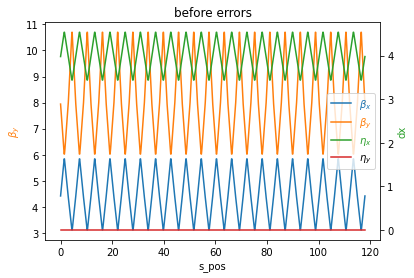

In [3]:
twiss = getOptics(ring, '*' )
make_plot(twiss, 'before errors')

In [4]:
eta_xx, eta_yy= eta(1.e-4, ring)


print(shape(eta_xx))
print(eta_yy)

(40,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
eta_0x, eta_0y, d_eta_x, d_eta_y = generatingQuadsResponse_eta(ring, eta_xx, eta_yy)

generating response to QF, n=19
generating response to QS, n=19
generating response to QD, n=19
loading response to: QF
loading response to: QS
loading response to: QD


In [6]:
#Qs_strength

qs_indexes = get_refpts(ring, 'QS')
errorQS = 5.e-2
for i in range(len(qs_indexes)):
    ring[qs_indexes[i]].K = (errorQS * random())

simulating perturbed machine...
preparing twiss ..
Tunes=[0.42385788 0.42691459]
Chrom=[-2.3939547  -2.36708352]


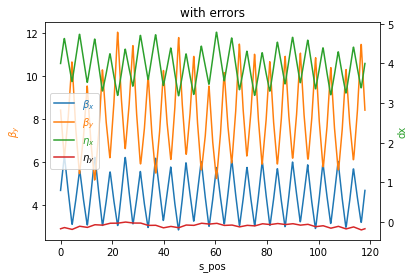

In [7]:
## simulate_errors

errorQF = 72.e-3
errorQD = 52.e-3
tiltQF = 3.e-3
tiltQD = 3.e-3
#shiftQF = 3.e-5
#shiftQD = 3.e-5
errorQS =0
shiftQF = 0
shiftQD = 0
quads_info_error = simulateError(ring, errorQF, errorQD,errorQS, tiltQF, tiltQD, shiftQF, shiftQD)
twiss_error = getOptics(ring, '*')
make_plot(twiss_error, 'with errors')

In [8]:
quads_info_error

,s_pos,Quad_strength,elements_name,occ
0,1.4,1.739629,QF,1
1,1.5,0.019009,QS,1
2,4.4,-2.166817,QD,1
3,7.3,1.723693,QF,2
4,7.4,0.032989,QS,2
5,10.3,-2.196825,QD,2
6,13.2,1.802317,QF,3
7,13.3,0.022528,QS,3
8,16.2,-2.158530,QD,3
9,19.1,1.734429,QF,4


In [9]:
getBetaBeat(twiss, twiss_error)

getBetaBeat bx and by: 
Simulated beta beat, x:3.8185256754140133%   y: 6.304117356569021%


In [10]:
# DRM (dispersion responce matrix)

eta_xx_err, eta_yy_err = eta(1.e-4, ring)

print(shape(eta_xx_err))
print(eta_xx_err)

(40,)
[4.62232612 3.54324259 4.73071755 3.5241189  4.61132829 3.31078315
 4.24066414 3.19371936 4.35286489 3.4259613  4.70095117 3.59588434
 4.71985347 3.4481706  4.38614045 3.187715   4.23564976 3.21782263
 4.42857182 3.47457048 4.78211129 3.56451207 4.63918245 3.34237922
 4.30480184 3.19560373 4.26568224 3.30006249 4.5291707  3.48377214
 4.6539507  3.51611614 4.58341527 3.36231959 4.38954018 3.2118388
 4.28815397 3.25450764 4.40509388 3.38392673]


In [11]:
A, B = defineMatrices_eta(eta_0x, eta_0y, eta_xx_err, eta_yy_err, d_eta_x, d_eta_y)

NK: 60
Nm: 60


In [12]:
B

array([[-4.15927893e+00],
       [-3.05817621e+00],
       [ 2.24394583e+00],
       [ 3.76242855e+00],
       [ 4.05801050e-01],
       [-2.83086216e+00],
       [-2.10485643e+00],
       [ 1.34029646e+00],
       [ 3.29811427e+00],
       [ 1.26575926e+00],
       [-2.32887354e+00],
       [-3.00443376e+00],
       [ 8.78355234e-01],
       [ 4.35345261e+00],
       [ 1.93615341e+00],
       [-3.50102830e+00],
       [-3.73622814e+00],
       [ 1.95064718e+00],
       [ 5.22660047e+00],
       [ 1.17616440e+00],
       [ 4.45567819e-05],
       [ 3.19265677e-05],
       [-2.44141350e-05],
       [-3.98336392e-05],
       [-3.76723454e-06],
       [ 3.03099861e-05],
       [ 2.20236928e-05],
       [-1.47364137e-05],
       [-3.50853211e-05],
       [-1.29721449e-05],
       [ 2.51726824e-05],
       [ 3.16532272e-05],
       [-1.00456338e-05],
       [-4.63970715e-05],
       [-1.98511239e-05],
       [ 3.77238903e-05],
       [ 3.91943432e-05],
       [-2.15589833e-05],
       [-5.5

number of singular values 60
A(120, 60) B(120, 1) U(120, 120) smat(120, 60) v(60, 60)


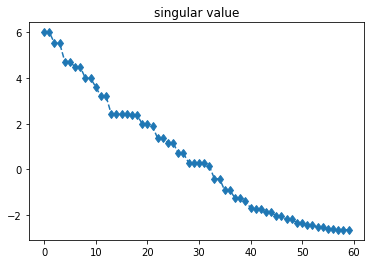

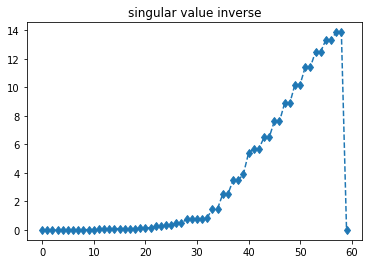

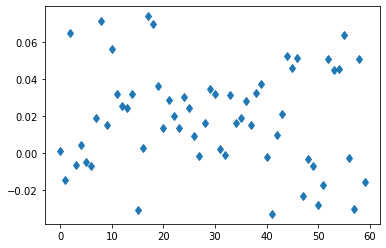

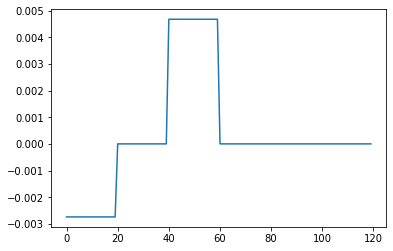

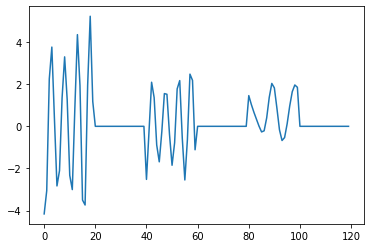

In [13]:
dk = len(d_eta_x)
cut = 59
Ai, r, e = getInverse(A, B,dk, cut)

In [14]:
n_list = len(quads_info_error.s_pos)
quads_info = quad_info(ring)
quad_dict, quad_vals = getQuadFamilies(quads_info)
quads = [k for k in quad_dict.keys()]
quad_names = quads
setCorrection(ring, quads_info_error,quad_names, r , quads_info, n_list)

define correction : Done
set correction : Done


In [15]:
quads_info_error

,s_pos,Quad_strength,elements_name,occ
0,1.4,1.739629,QF,1
1,1.5,0.019009,QS,1
2,4.4,-2.166817,QD,1
3,7.3,1.723693,QF,2
4,7.4,0.032989,QS,2
5,10.3,-2.196825,QD,2
6,13.2,1.802317,QF,3
7,13.3,0.022528,QS,3
8,16.2,-2.158530,QD,3
9,19.1,1.734429,QF,4


In [16]:
twiss_corrected = getOptics(ring, '*')

preparing twiss ..
Tunes=[0.39667574 0.46951261]
Chrom=[-2.70695649 -2.02838585]


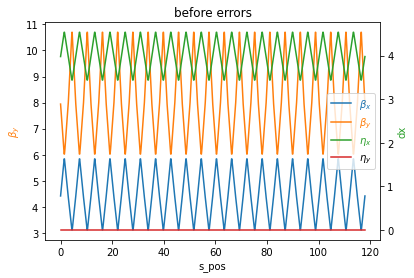

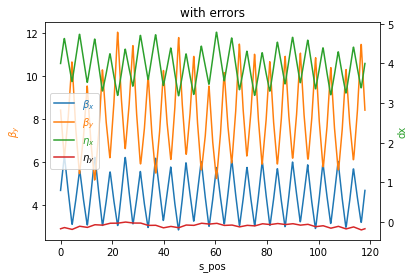

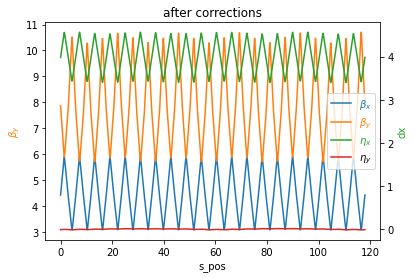

In [17]:
make_plot(twiss, 'before errors')
make_plot(twiss_error, 'with errors')
make_plot(twiss_corrected, 'after corrections')

In [18]:
getBetaBeat(twiss, twiss_error)
getBetaBeat(twiss, twiss_corrected)

getBetaBeat bx and by: 
Simulated beta beat, x:3.8185256754140133%   y: 6.304117356569021%
getBetaBeat bx and by: 
Simulated beta beat, x:0.8138434477009364%   y: 1.4928682915724625%


In [19]:
eta_xx_corr, eta_yy_corr= eta(1.e-4, ring)

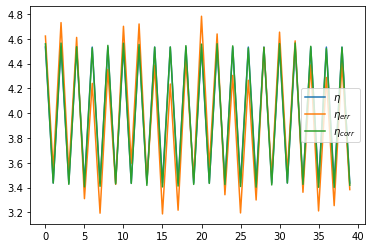

In [20]:
compare_drm(eta_xx, eta_xx_err, eta_xx_corr)

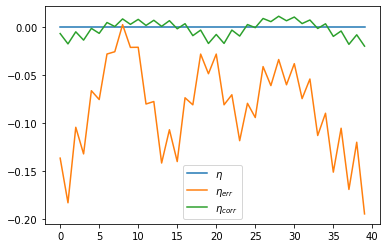

In [21]:
compare_drm(eta_yy, eta_yy_err, eta_yy_corr)